#### Notebook `Feature Selection`

#### Group:
- `Miguel Matos - 20221925`
- `André Nicolau - 20221861`
- `André Ferreira - 20250398`

---

#### <font> Table of Contents </font> <a class="anchor" id='toc'></a> 
1. [Imports](#Imports)
2. [Feature Selection](#feature-selection)


# Imports
[Back to TOC](#toc)

In [1]:
from functions import *

In [2]:
X_train = pd.read_csv("../data/X_train.csv", index_col= "carID")
y_train = pd.read_csv("../data/y_train.csv", index_col= "carID")

X_val = pd.read_csv("../data/X_val.csv", index_col= "carID")
y_val = pd.read_csv("../data/y_val.csv", index_col= "carID")

#For testing categorical variables
X_categoricals = pd.read_csv("../data/data_cleaned.csv", index_col= "carID")

pd.set_option("display.max_columns", None)

# Feature Selection
[Back to TOC](#toc)


## Correlation Matrix

Firstly, let's take a look a highly correlated features that can give us an insight for which variables to drop.

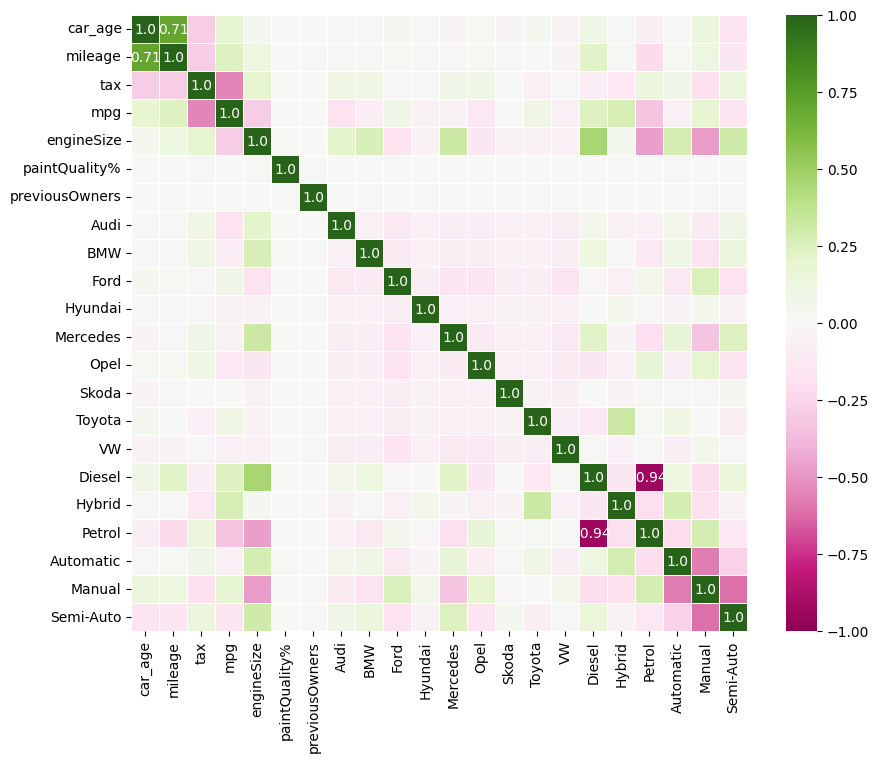

In [3]:
correlation_matrix(X_train, 0.7)

- "car_age" and "mileage" have a high correlation, of 71, but we still need to look at other feature selection techniques to get more insights and to decide whether either "car_age" or "mileage" are up to remove.

## Chi-Square Test on Categorical variables

For this test, we'll use the dataset cleaned, but not yet encoded or scaled.

In [4]:
X_categoricals = X_categoricals.select_dtypes(exclude= np.number)
indexes = X_train.index.to_list() #Getting the indexes of the X_train
X_train_cat = X_categoricals.loc[indexes] # Getting only the rows that correspond to X_train
X_train_cat.head()

,Brand,model,transmission,fuelType
carID,,,,
1696,Audi,Q3,Manual,Petrol
4757,Audi,A5,Automatic,Diesel
2943,Audi,A1,Manual,Petrol
4670,Audi,A3,Semi-Auto,Diesel
2761,Audi,Sq5,Automatic,Diesel


In [5]:
# Transforming y_train into a Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]

In [6]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is IMPORTANT for Prediction
fuelType is IMPORTANT for Prediction


Looks like all the variables are important for the model.

## Wrapper Methods

In [15]:
model = LinearRegression()
len(X_train.columns)

22

In [16]:
rfe = RFE(model, n_features_to_select=11, step=1)

In [17]:
rfe.fit_transform(X_train, y_train)

array([[ 0.33333333,  0.8490747 , -0.36942675, ...,  0.        ,
         1.        ,  0.        ],
       [-0.66666667, -0.70482287, -0.52866242, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.        ,  2.08349403, -0.13375796, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        , -0.15349978, -0.80254777, ...,  1.        ,
         0.        ,  0.        ],
       [-0.66666667, -0.09005644, -0.92356688, ...,  0.        ,
         1.        ,  0.        ],
       [-0.66666667, -0.64020838, -0.13375796, ...,  0.        ,
         1.        ,  0.        ]])

In [18]:
rfe.ranking_

array([ 1,  1,  2,  1,  1,  4,  1, 10,  3,  9, 11,  7, 12,  8,  5,  6,  1,
        1,  1,  1,  1,  1])

In [19]:
selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features

car_age            True
mileage            True
tax               False
mpg                True
engineSize         True
paintQuality%     False
previousOwners     True
Audi              False
BMW               False
Ford              False
Hyundai           False
Mercedes          False
Opel              False
Skoda             False
Toyota            False
VW                False
Diesel             True
Hybrid             True
Petrol             True
Automatic          True
Manual             True
Semi-Auto          True
dtype: bool

In [20]:
#no of features
nof_list=np.arange(1,len(X_train.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Brand
- fuelType
- model
- transmission
Feature names seen at fit time, yet now missing:
- Audi
- Automatic
- BMW
- Diesel
- Ford
- ...
